In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

creditcard.csv



In [2]:
# Import the commmly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Make sure the ipython notebook will display the figures 
%matplotlib inline

In [4]:
# Load the data
data = pd.read_csv ("../input/creditcard.csv")

# Display the first few lines of the credit card data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Display the column names in the data
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

It seems that there are 31 columns in the data

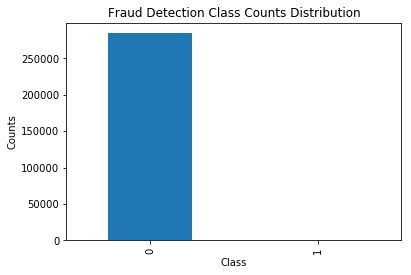

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')

plt.title("Fraud Detection Class Counts Distribution")
plt.xlabel("Class")
plt.ylabel("Counts")

Apparently, most data here are in the "normal" class, or to say that most transaction data are normal. Only a few transaction data points are conisdered to be abnormal, or fraut. Thus, this is an unbalanced data sets, are therefor challenging for the maching learning prediction, especially for accuracy. Thefore, we need to adjust the amount of normal class data and the abnormal class data, to make them balanaced, by either increasing the amounf of the abnormal class data using the technique called over sampling, or by decreasing the amount of the normal class data using the techque called under sampling. 

Here I chose the latter technique by seleting some data points out of normal class data set.

In [7]:
# First of all, we need to decide which columns are our features and which is/are variant(s) 
# we need to predict
fcol = data.ix[:, data.columns != 'Class']
rcol = data.ix[:, data.columns == 'Class']

# To begin with the data selecting procedure, we need to find out the indices of both the normal
abnormal_indices = np.array(data[data.Class == 1].index)
normal_indices = np.array(data[data.Class == 0].index)

#Find out the number of abnormal data entries 
n_abnormal = len(data[data.Class == 1])


# Then, we can randomly select the normal data entries' indices
random_normal_indices = np.random.choice(normal_indices, n_abnormal, replace = False)
len(random_normal_indices)

# Now we can merge the selected normal and the original normal data entries
under_sample_indices = np.concatenate([abnormal_indices,random_normal_indices])
under_sample_data = data.ix[under_sample_indices,:]

# Based on this under samppled data set, we can indicate our feature colummns and result columns
fcol_under = under_sample_data.ix[:, data.columns != 'Class']
rcol_under = under_sample_data.ix[:, data.columns == 'Class']

# Double check the data size for both normal and abnormal class in this generated data set
print("Number of normal transactions", len(under_sample_data.Class == 0))
print("Number of abnormal transactions", len(under_sample_data.Class == 1))



Number of normal transactions 984
Number of abnormal transactions 984


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Now that we have create a balanced dataset, we can prepare our training and testing datasets by spliting.

In [8]:
# Import the spliting package
from sklearn.cross_validation import train_test_split

# Prepare the training and testing data sets from the original whole data
f_train, f_test,r_train, r_test = train_test_split(fcol, rcol, test_size = 0.33, random_state = 0)

# Prepare the training and testing data sets from the under sampled data
f_under_train, f_under_test,r_under_train, r_under_test = train_test_split(fcol_under, rcol_under, test_size = 0.33, random_state = 0) 


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now we can use the logistic regression classfier to train our data from the original and the under sampled conditions.

In [9]:
# Import the logist regression, cross_validation and prediction metrics packages.
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [10]:
# Define a kfold score function to diplay the recall score with different choices of C parameter
def Kfold_scores(f_train_data,r_train_data):
    fold = KFold(len(r_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(f_train_data.iloc[indices[0],:],r_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            r_pred_undersample = lr.predict(f_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(r_train_data.iloc[indices[1],:].values,r_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [11]:
best_c = Kfold_scores(f_under_train, r_under_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.830985915493
Iteration  2 : recall score =  0.838235294118
Iteration  3 : recall score =  0.898305084746
Iteration  4 : recall score =  0.898550724638
Iteration  5 : recall score =  0.888888888889

Mean recall score  0.870993181577

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.859154929577
Iteration  2 : recall score =  0.897058823529
Iteration  3 : recall score =  0.966101694915
Iteration  4 : recall score =  0.927536231884
Iteration  5 : recall score =  0.904761904762

Mean recall score  0.910922716934

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.87323943662
Iteration  2 : recall score =  0.897058823529
Iteration  3 : recall score =  0.983050847458
Iteration  

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall score =  0.87323943662
Iteration  2 : recall score =  0.882352941176
Iteration  3 : recall score =  0.983050847458
Iteration  4 : recall score =  0.927536231884
Iteration  5 : recall score =  0.920634920635

Mean recall score  0.917362875555

*********************************************************************************
Best model to choose from cross validation is with C parameter =  1.0
*********************************************************************************


In [12]:
# Since we found the best C parameter is 10.0, now that we can try to find out the recall value 
# using the such C 
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(f_under_train,r_under_train.values.ravel())
r_pred_undersample = lr.predict(f_under_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(r_under_test,r_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.91975308642


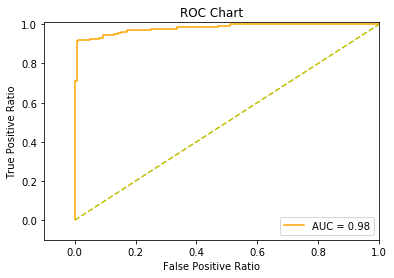

In [13]:
# Plot the ROC curve
lr = LogisticRegression(C = best_c, penalty = 'l1')
r_pred_undersample_score = lr.fit(f_under_train,r_under_train.values.ravel()).decision_function(f_under_test.values)

fpr, tpr, thresholds = roc_curve(r_under_test.values.ravel(),r_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('ROC Chart')
plt.plot(fpr, tpr, 'orange',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Ratio')
plt.xlabel('False Positive Ratio')

From the above ROC curve, we can see that the model we have been using is predicting correctly as a whole.

In [14]:
# We can do the similar thing using the original whold data
lr.fit(f_train,r_train.values.ravel())
r_pred_Wholesample = lr.predict(f_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(r_test,r_pred_Wholesample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))


Recall metric in the testing dataset:  0.598765432099


Apparently, our under sampling data generating pays off!